In [1]:
import pandas as pd
df=pd.read_csv("Phishing_URL_Dataset.csv")

In [2]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [3]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [8]:
df.describe

<bound method NDFrame.describe of            FILENAME                                                URL  \
0        521848.txt                   https://www.southbankmosaics.com   
1         31372.txt                           https://www.uni-mainz.de   
2        597387.txt                     https://www.voicefmradio.co.uk   
3        554095.txt                        https://www.sfnmjournal.com   
4        151578.txt                 https://www.rewildingargentina.org   
...             ...                                                ...   
235790   660997.txt                     https://www.skincareliving.com   
235791    77185.txt                      https://www.winchester.gov.uk   
235792   622132.txt                    https://www.nononsensedesign.be   
235793  7503962.txt  https://patient-cell-40f5.updatedlogmylogin.wo...   
235794   384822.txt                 https://www.alternativefinland.com   

        URLLength                                           Domain  \
0      

In [11]:
df.dtypes

FILENAME                       object
URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode  

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


# Encode non-numeric columns: 'URL', 'Domain', 'Title'
encoder = LabelEncoder()
df['URL_encoded'] = encoder.fit_transform(df['URL'])
df['TLD_encoded']= encoder.fit_transform(df['TLD'])
df['Domain_encoded'] = encoder.fit_transform(df['Domain'])
df['Title_encoded'] = encoder.fit_transform(df['Title'])

# Drop target feature
y = df['label']

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit Random Forest Classifier to the data
rf.fit(df.drop(['label','FILENAME','URL','TLD','Domain','Title'] ,axis=1), y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': df.drop(['label','FILENAME','URL','TLD','Domain','Title'], axis=1).columns, 'Importance': feature_importances})

# Sort DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print top 10 features
print("Top 10 features:")
print(feature_importance_df.head(10))


Top 10 features:
               Feature  Importance
50         URL_encoded    0.180297
3   URLSimilarityIndex    0.111389
22          LineOfCode    0.103407
47         NoOfSelfRef    0.075572
45             NoOfCSS    0.073396
44           NoOfImage    0.070353
49     NoOfExternalRef    0.070232
46              NoOfJS    0.049338
52      Domain_encoded    0.042151
43    HasCopyrightInfo    0.041120


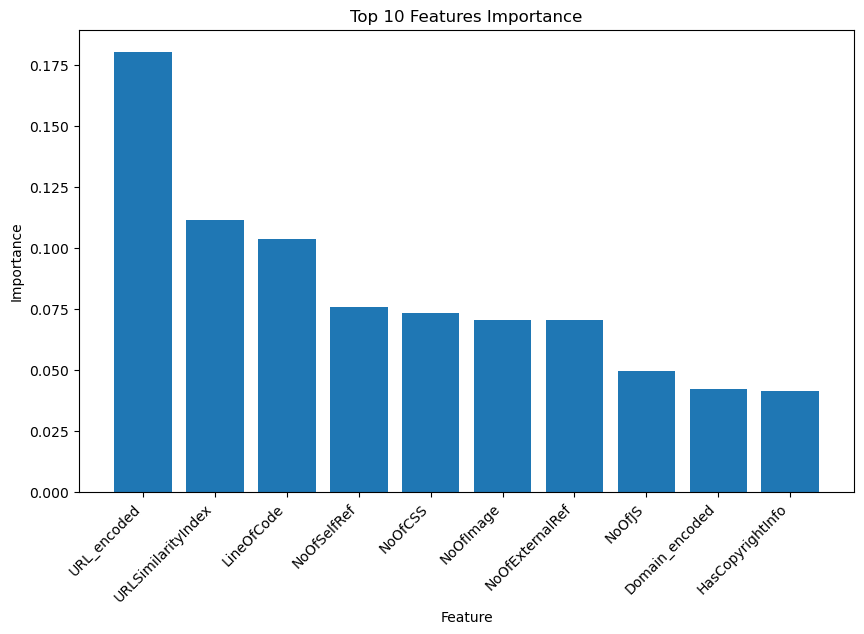

In [23]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Features Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


In [20]:

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder




# Drop non-numeric columns and target feature
X = df.drop(['FILENAME', 'URL', 'Domain','TLD','Title', 'label'], axis=1)
y = df['label']

# Perform feature selection
selector = SelectKBest(score_func=chi2, k=10)  # Adjust k as needed
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_feature_names = X.columns[selector.get_support(indices=True)]

# Print selected features
print("Selected features:", selected_feature_names)


Selected features: Index(['LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore',
       'URLTitleMatchScore', 'NoOfImage', 'NoOfSelfRef', 'NoOfExternalRef',
       'URL_encoded', 'Domain_encoded', 'Title_encoded'],
      dtype='object')


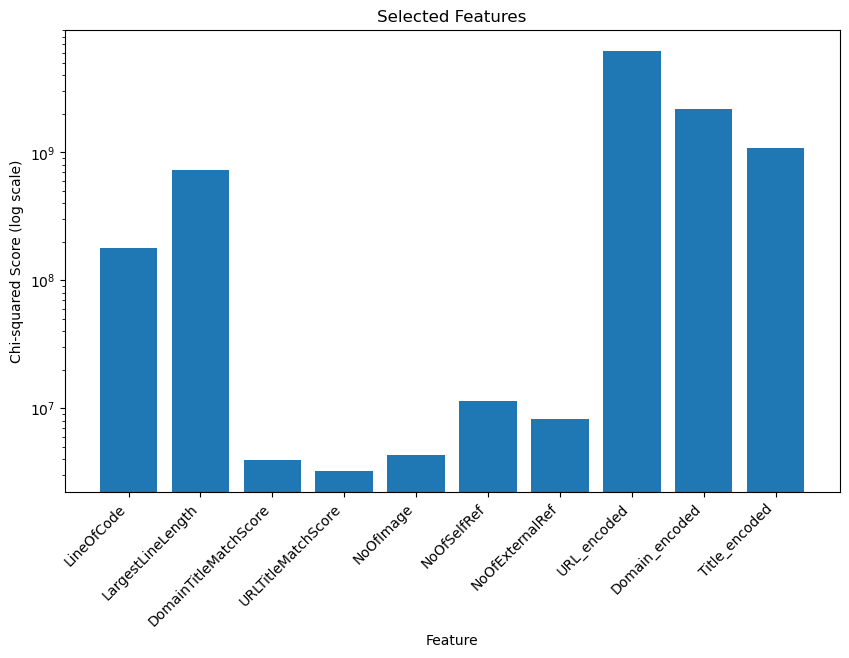

In [22]:
import matplotlib.pyplot as plt

# Plot selected features
import numpy as np

# Plot selected features with logarithmic scale
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, selector.scores_[selector.get_support(indices=True)])
plt.xlabel('Feature')
plt.ylabel('Chi-squared Score (log scale)')
plt.title('Selected Features')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming X_selected contains the selected features and y contains the target variable
# Replace X_selected and y with your actual selected features and target variable
X_selected = df[['URL_encoded', 'URLSimilarityIndex', 'LineOfCode','LargestLineLength','Title_encoded','NoOfSelfRef']]  # Replace 'feature1', 'feature2', 'feature3' with your selected feature names
y = df['label']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
from sklearn.metrics import accuracy_score

# Predict the target labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 100.0


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0


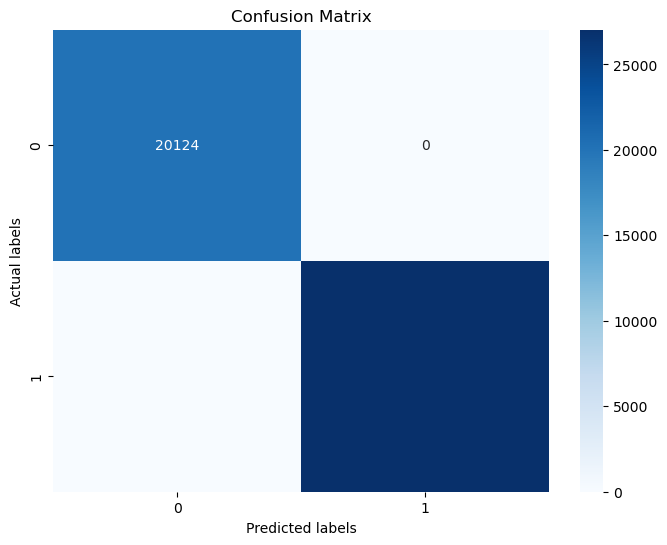

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained the model and obtained predictions y_pred
# y_pred = rf_classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
labels = ['0', '1']  # Update with your actual class labels

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()


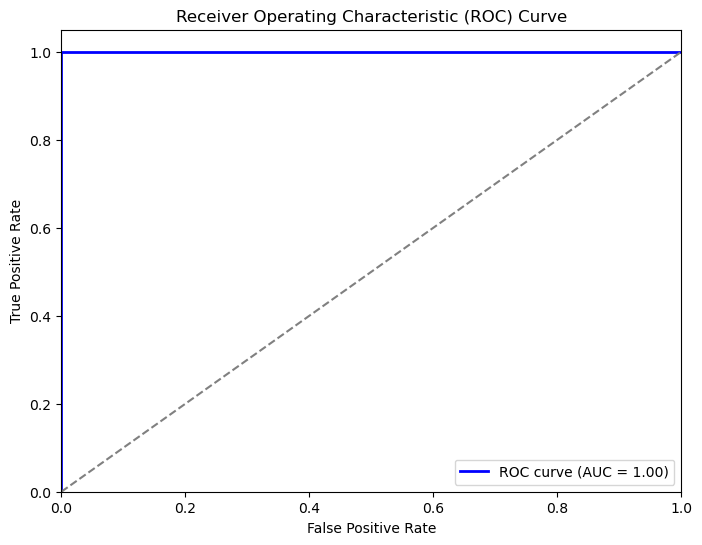

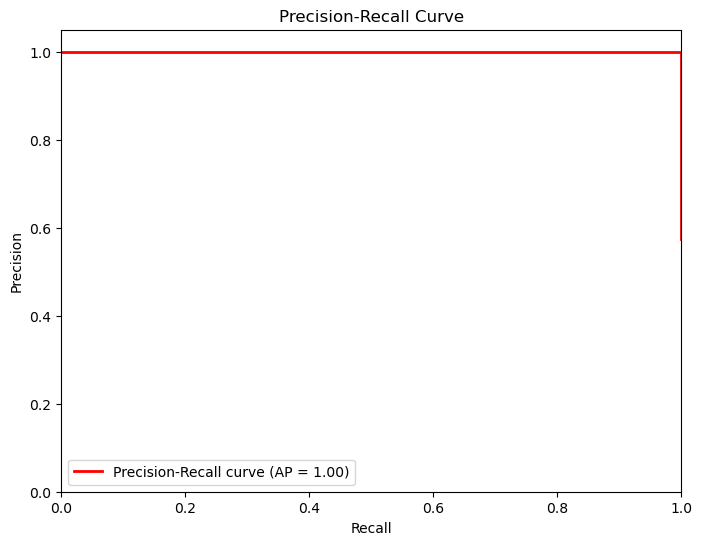

In [31]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
probabilities = rf_classifier.predict_proba(X_test)[:, 1]
# Assuming you have trained the model and obtained predictions y_pred
# y_pred = rf_classifier.predict(X_test)
# Also, assuming you have the probabilities of the positive class (class 1)
# If your classifier provides probabilities, you can obtain them using predict_proba method
# For example, probabilities = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, probabilities)
average_precision = average_precision_score(y_test, probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.show()
